In [77]:
import glob
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# def normal_accum(results, count, eval_code):
#     value = 0
#     epsilons = []
#     for result, epsilon in results:
#         epsilons.append(epsilon)
#         value += result[eval_code][-1][0]
#     if len(results) > 1:
#         assert epsilons[0] == epsilons[1], "epsilon bag"

#     return value / count, epsilons[0]

def get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score="auroc"):
    dirs = glob.glob("results/2022*")
    results = []
    count = 0
    for dir in dirs:
        with open(dir + "/param.json", "r") as f:
            params = json.load(f)
        
        if params["noise_for_small"]==noise_for_small and params["noise_for_large"]==noise_for_large and params["share_abnormal_ratio"]==share_abnormal_ratio and params["n_small_users"]==n_small_users:
            count += params["ITR"]
            with open(dir + "/scores.pkl", "rb") as f:
                results.append([pickle.load(f)[0][eval_score] * params["ITR"], params["epsilon"]])
        
    assert len(results) != 0, "file not found"
    # print(f"{len(results)} file found")
    
    return np.array(results)[:,0].sum() / count, results[0][1]

#eval_score_transform = {"f1": 5, "auroc":4, "precision":3, "recall":2, "accuracy":1, "loss": 0}
#eval_score = "auroc"

In [79]:
# eval_score = "recall"
#eval_code = eval_score_transform["auroc"]

recall


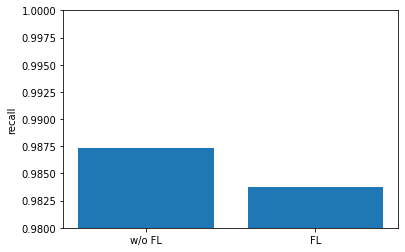

auroc


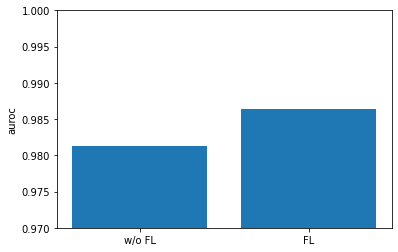

FLした場合としていない場合の比較
FLしたらrecallが下がる
これは unbalance な データだから
精度は上がっている
これは 異常値データがFLによって増えたから、見分ける能力がついた


In [80]:
eval_score = "recall"

result_only_large, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
result, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)

left = np.arange(2)
labels = ["w/o FL", "FL"]

print(eval_score)
plt.bar(left, [result_only_large, result])
plt.xticks(left, labels)
plt.ylim(0.98,1)
plt.ylabel(eval_score)
plt.show()

####

eval_score = "auroc"

result_only_large, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
result, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)

left = np.arange(2)
labels = ["w/o FL", "FL"]

print(eval_score)
plt.bar(left, [result_only_large, result])
plt.xticks(left, labels)
plt.ylim(0.97,1)
plt.ylabel(eval_score)
plt.show()

print("FLした場合としていない場合の比較")
print("FLしたらrecallが下がる")
print("これは unbalance な データだから")
print("精度は上がっている")
print("これは 異常値データがFLによって増えたから、見分ける能力がついた")

In [81]:
# epsilons = []
# large_results = []
# noises = [5,8,30,100]

# eval_score = "recall"
# for noise in noises:
#     result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    
#     epsilons.append(epsilon)
#     large_results.append(result)

# print(eval_score)
# plt.plot(epsilons, large_results, label="large DP small DP")
# plt.legend()
# plt.xlabel("$\epsilon$")
# plt.ylabel(eval_score)
# plt.show()

# print("大規模、小規模ともににDPを導入")

# ##

# epsilons = []
# large_results = []
# noises = [5,8,30,100]

# eval_score = "auroc"
# for noise in noises:
#     result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
#     epsilons.append(epsilon)
#     large_results.append(result)

# print(eval_score)
# plt.plot(epsilons, large_results, label="large DP small DP")
# plt.legend()
# plt.xlabel("$\epsilon$")
# plt.ylabel(eval_score)
# plt.show()

recall


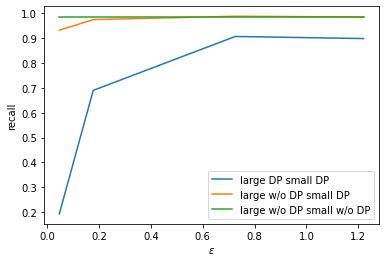

auroc


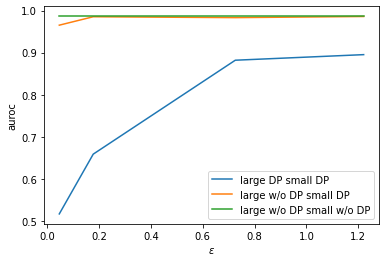

DPを入れるサイトを変更して比較
ノイズが小さい範囲だと、小規模にDPを導入しても大きな影響はない。


In [82]:
epsilons = []
large_results = []
both_dp_results = []
wo_DP_results = []
noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_both_dp, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    both_dp_results.append(result_both_dp)
    wo_DP_results.append(result_wo_dp)

print(eval_score)
plt.plot(epsilons, both_dp_results, label="large DP small DP")
plt.plot(epsilons, large_results, label="large w/o DP small DP")
plt.plot(epsilons, wo_DP_results, label="large w/o DP small w/o DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()


##
epsilons = []
large_results = []
both_dp_results = []
wo_DP_results = []
noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_both_dp, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    epsilons.append(epsilon)
    wo_DP_results.append(result_wo_dp)
    large_results.append(result)
    both_dp_results.append(result_both_dp)

print(eval_score)
plt.plot(epsilons, both_dp_results, label="large DP small DP")
plt.plot(epsilons, large_results, label="large w/o DP small DP")
plt.plot(epsilons, wo_DP_results, label="large w/o DP small w/o DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("DPを入れるサイトを変更して比較")
print("ノイズが小さい範囲だと、小規模にDPを導入しても大きな影響はない。")

recall


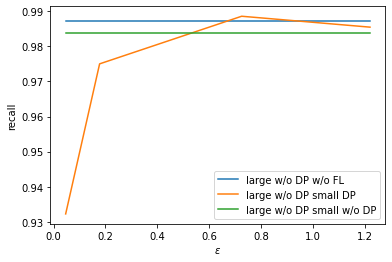

auroc


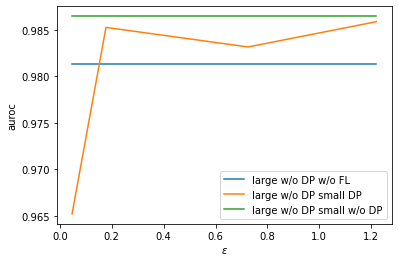

DPを導入した小規模は、DPを導入していない大規模のrecall、精度を下げないか検証
recall
ノイズが小さい範囲だと小規模に導入した場合と、FLしていない場合がほぼ同じ。
最初の実験の結果からFLによって精度が下がることがわかったが、小規模にノイズを加えることでFLでも精度が上がるようになった。
基本的に小規模は異常値が少ないから、recallを下げる効果があって、ノイズがそれを抑制している。
auroc
ノイズが小さい範囲だと小規模はDPを導入していたとしても大規模の精度を上げる。
ε=0.2は結構大きなノイズ（二個目の実験より）だが、精度を上げることに成功している。


In [83]:
epsilons = []
large_results = []
large_wo_dp_results = []
only_large_wo_noise_results = []
noise_for_smalls = [5,8,30,100]
eval_score = "recall"

for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large_wo_noise, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    result_wo_dp, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    large_results.append(result)
    only_large_wo_noise_results.append(result_only_large_wo_noise)
    large_wo_dp_results.append(result_wo_dp)

print(eval_score)
plt.plot(epsilons, only_large_wo_noise_results, label="large w/o DP w/o FL")
plt.plot(epsilons, large_results, label="large w/o DP small DP")
plt.plot(epsilons, large_wo_dp_results, label="large w/o DP small w/o DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

##

epsilons = []
large_results = []
only_large_wo_noise_results = []
large_wo_dp_results = []
noise_for_smalls = [5,8,30,100]
eval_score = "auroc"

for noise_for_small in noise_for_smalls:
    result, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large_wo_noise, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    result_wo_dp, epsilon = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    large_results.append(result)
    large_wo_dp_results.append(result_wo_dp)
    only_large_wo_noise_results.append(result_only_large_wo_noise)

print(eval_score)
plt.plot(epsilons, only_large_wo_noise_results, label="large w/o DP w/o FL")
plt.plot(epsilons, large_results, label="large w/o DP small DP")
plt.plot(epsilons, large_wo_dp_results, label="large w/o DP small w/o DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("DPを導入した小規模は、DPを導入していない大規模のrecall、精度を下げないか検証")
print("recall")
print("ノイズが小さい範囲だと小規模に導入した場合と、FLしていない場合がほぼ同じ。")
print("最初の実験の結果からFLによって精度が下がることがわかったが、小規模にノイズを加えることでFLでも精度が上がるようになった。")
print("基本的に小規模は異常値が少ないから、recallを下げる効果があって、ノイズがそれを抑制している。")

print("auroc")
print("ノイズが小さい範囲だと小規模はDPを導入していたとしても大規模の精度を上げる。")
print("ε=0.2は結構大きなノイズ（二個目の実験より）だが、精度を上げることに成功している。")

recall


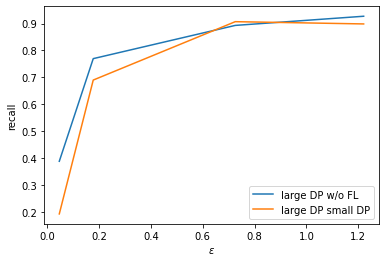

auroc


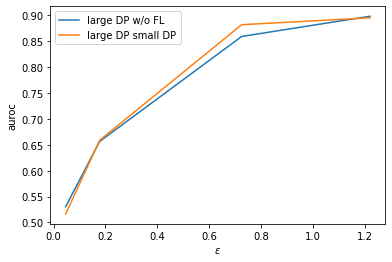

大規模がDPで単体でやった時と、大規模DPと小規模DPでFLした時の比較
どちらも大した差は見られない。
傾向的にはやはり今までと同様、小規模の参加はrecallを下げる傾向にあり、精度を上げる傾向にある。


In [84]:
epsilons = []
large_results = []
only_large_results = []

large_results_only_large = []

noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large, _ = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    only_large_results.append(result_only_large)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, only_large_results, label="large DP w/o FL")
plt.plot(epsilons, large_results, label="large DP small DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

##

epsilons = []
large_results = []
only_large_results = []

large_results_only_large = []

noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4, eval_score=eval_score)
    result_only_large, _ = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    only_large_results.append(result_only_large)
    large_results.append(result)

print(eval_score)
plt.plot(epsilons, only_large_results, label="large DP w/o FL")
plt.plot(epsilons, large_results, label="large DP small DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("大規模がDPで単体でやった時と、大規模DPと小規模DPでFLした時の比較")
print("どちらも大した差は見られない。")
print("傾向的にはやはり今までと同様、小規模の参加はrecallを下げる傾向にあり、精度を上げる傾向にある。")

recall


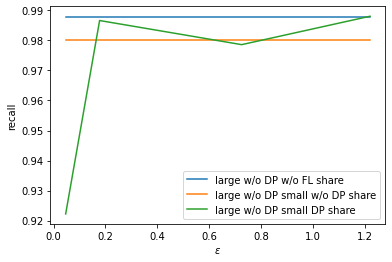

auroc


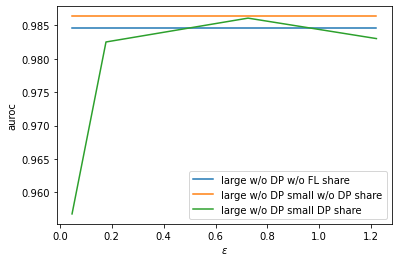

異常値を共有している場合に小規模へのDPの導入の影響を調べる実験
recall
異常値を共有している場合でも、実験3と同じ結果が得られた。
auroc
精度の面では、異常値を共有していない場合と差異が現れた。
異常値を共有している場合、小規模（DP）の参加により精度が下がる可能性がある。


In [85]:
epsilons = []
large_results = []
wo_dp_results = []
wo_fl_results = []

noises = [5,8,30,100]

eval_score = "recall"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_fl, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    wo_dp_results.append(result_wo_dp)
    wo_fl_results.append(result_wo_fl)

print(eval_score)
plt.plot(epsilons, wo_fl_results, label="large w/o DP w/o FL share")
plt.plot(epsilons, wo_dp_results, label="large w/o DP small w/o DP share")
plt.plot(epsilons, large_results, label="large w/o DP small DP share")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

##

epsilons = []
large_results = []
wo_dp_results = []
wo_fl_results = []

noises = [5,8,30,100]

eval_score = "auroc"
for noise in noises:
    result, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4, eval_score=eval_score)
    result_wo_fl, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=0, eval_score=eval_score)
    epsilons.append(epsilon)
    large_results.append(result)
    wo_dp_results.append(result_wo_dp)
    wo_fl_results.append(result_wo_fl)

print(eval_score)
plt.plot(epsilons, wo_fl_results, label="large w/o DP w/o FL share")
plt.plot(epsilons, wo_dp_results, label="large w/o DP small w/o DP share")
plt.plot(epsilons, large_results, label="large w/o DP small DP share")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)
plt.show()

print("異常値を共有している場合に小規模へのDPの導入の影響を調べる実験")
print("recall")
print("異常値を共有している場合でも、実験3と同じ結果が得られた。")
print("auroc")
print("精度の面では、異常値を共有していない場合と差異が現れた。")
print("異常値を共有している場合、小規模（DP）の参加により精度が下がる可能性がある。")